<a href="https://colab.research.google.com/github/aghavvaishnavi/FinGuardAITask1_vaishnavi_241ds004/blob/main/fin_ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('fin.csv')

In [ ]:
df.shape

(1048575, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [ ]:
df['isFraud'].value_counts(normalize=True)*100

isFraud
0    99.89109
1     0.10891
Name: proportion, dtype: float64

In [ ]:
df = df.drop_duplicates()
df = df.drop(['nameOrig', 'nameDest'], axis=1) #useless as they don't help in ml

In [ ]:
df.shape

(1048575, 9)

In [ ]:
df = df.iloc[:-1043575]    #as it's a really large dataset , we will take only first 5000 rows

In [ ]:
df.shape

(5000, 9)

In [ ]:
df['isFraud'].value_counts(normalize=True)*100

isFraud
0    99.2
1     0.8
Name: proportion, dtype: float64

In [ ]:
df['type'].value_counts()

type
PAYMENT     2587
CASH_IN     1082
CASH_OUT     631
TRANSFER     437
DEBIT        263
Name: count, dtype: int64

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [ ]:
df[df['isFraud'] == 1].head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,0
3,1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1,0


handeling missing values


In [ ]:
#first we will look for any null values
df.isnull().sum()   #nope...no null values

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
#but if they appear , what we can do is
#1. df.dropna()                         dropped rows(if only some of the rows have missing values)
#2. df.drop(['col_name'] , axis=1)      dropping columns if one column has many missing vlues , or the column as whole is useless to ml.
#3. df['col_name'] = df['col_name'].fillna(df['col_name'].m())     filling in values with the mean / mode / median of that column
                                                                   # mean --> numeric data normally distributed
                                                                   # median --> numeric with outliers
                                                                   # mode --> categorical data


handeling outliers

In [ ]:
num_cols = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
print(df[num_cols].describe().T)   #T stands for transpose
print('\n')
for c in num_cols:
    q95 = df[c].quantile(0.95)
    q99 = df[c].quantile(0.99)
    q999 = df[c].quantile(0.999)
    print(f"{c}: 95%={q95:.2f}, 99%={q99:.2f}, 99.9%={q999:.2f}")  #rounded upto 2 decimal points
print('\n')

#we'll use IQR for detecting outliers
# IQR method: returns boolean Series if row is outlier for that col
def iqr_outlier_mask(series, k=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - k * IQR
    upper = Q3 + k * IQR
    return (series < lower) | (series > upper)

# check counts
for c in num_cols:
    mask = iqr_outlier_mask(df[c])
    print(c, "IQR outliers:", mask.sum(), f"({mask.mean():.2%})")

                 count          mean           std   min        25%  \
amount          5000.0  1.015176e+05  3.009623e+05  6.42  3734.9225   
oldbalanceOrg   5000.0  1.042517e+06  2.301872e+06  0.00   572.2500   
newbalanceOrig  5000.0  1.064332e+06  2.343668e+06  0.00     0.0000   
oldbalanceDest  5000.0  9.182340e+05  2.542204e+06  0.00     0.0000   
newbalanceDest  5000.0  1.065315e+06  2.923836e+06  0.00     0.0000   

                      50%         75%         max  
amount          10958.550  108604.585  10000000.0  
oldbalanceOrg   26550.555  295718.280  12900000.0  
newbalanceOrig  18141.855  300320.690  13000000.0  
oldbalanceDest      0.000  363847.480  19500000.0  
newbalanceDest      0.000  270110.780  19200000.0  


amount: 95%=404059.25, 99%=1123245.18, 99.9%=2837363.80
oldbalanceOrg: 95%=6823524.33, 99%=9858071.37, 99.9%=12300200.00
newbalanceOrig: 95%=6969823.95, 99%=9957654.00, 99.9%=12500000.00
oldbalanceDest: 95%=6292625.19, 99%=12500000.00, 99.9%=19200100.00
newba

In [ ]:
import matplotlib.pyplot as plt

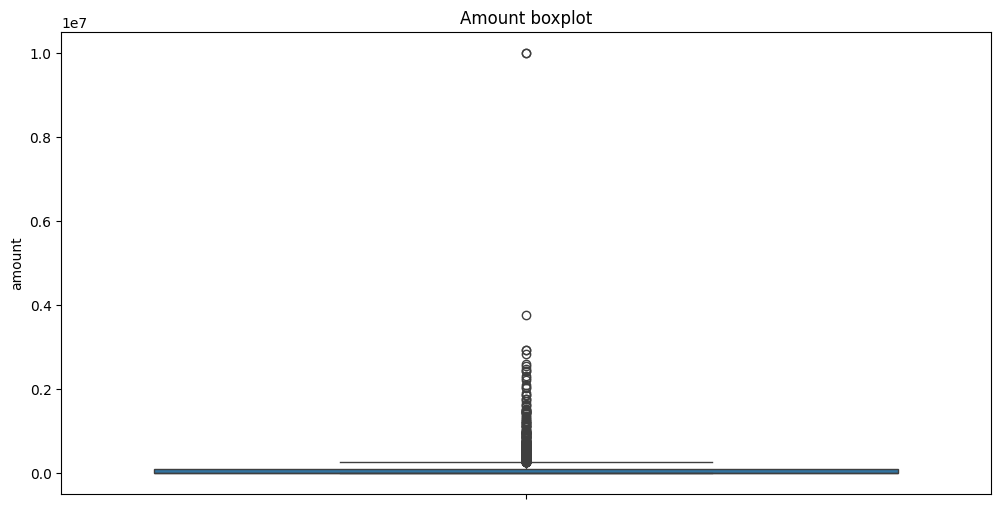

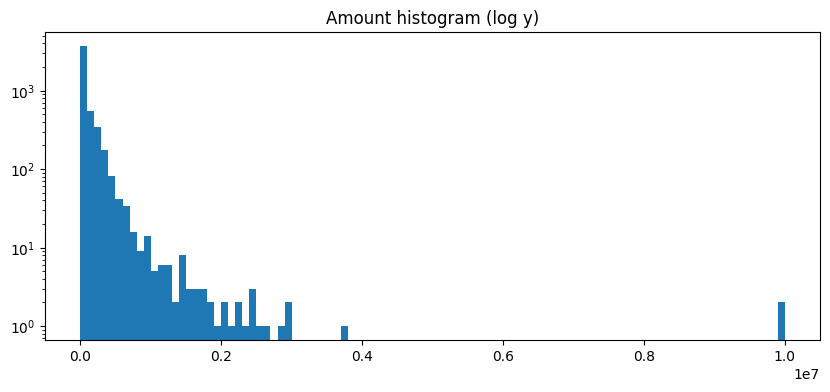

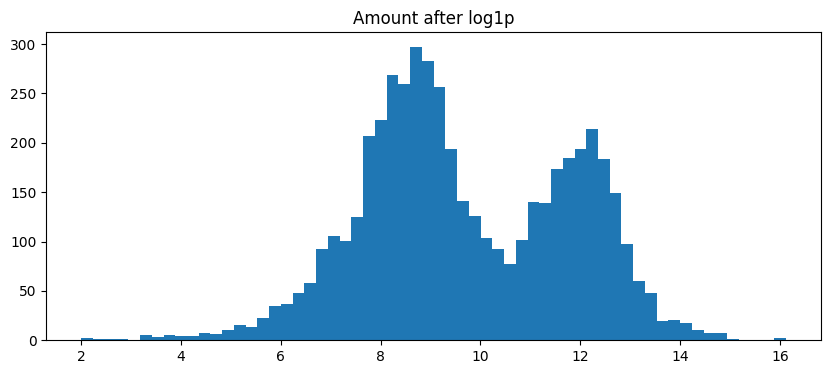

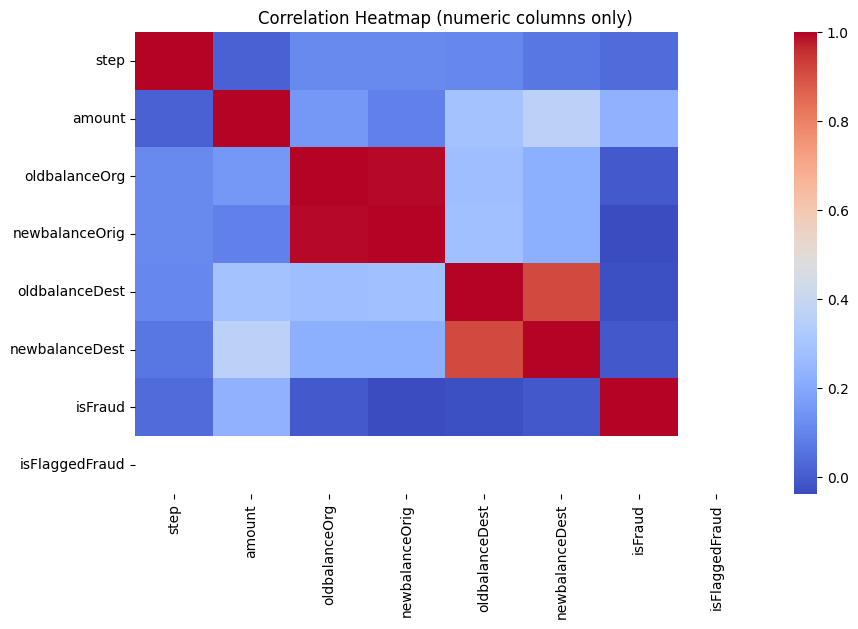

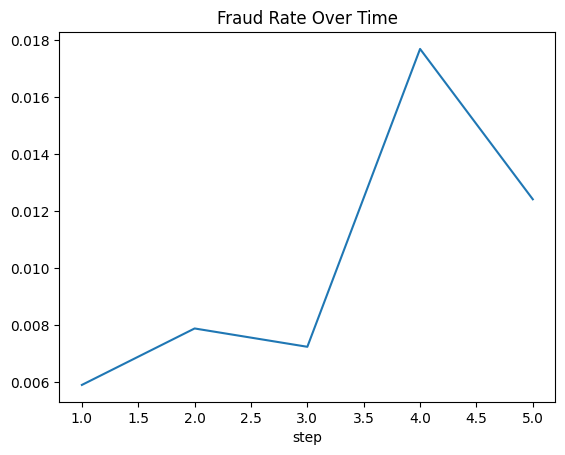

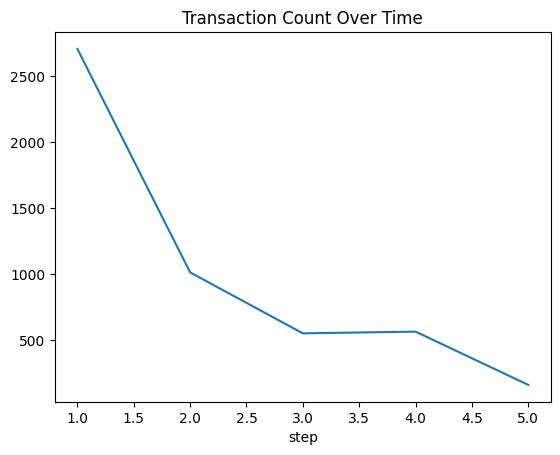

In [ ]:
# boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df['amount'])
plt.title('Amount boxplot')
plt.show()

# histogram (log scale view)
plt.figure(figsize=(10,4))
plt.hist(df['amount'], bins=100)
plt.yscale('log')   # if very skewed use log scale for y
plt.title('Amount histogram (log y)')
plt.show()

# histogram after log transform (to inspect shape)
plt.figure(figsize=(10,4))
plt.hist(np.log1p(df['amount']), bins=60)
plt.title('Amount after log1p')
plt.show()


#heatmap

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='coolwarm')
plt.title("Correlation Heatmap (numeric columns only)")
plt.show()


#over time
df.groupby('step')['isFraud'].mean().plot()
plt.title("Fraud Rate Over Time")
plt.show()

df['step'].value_counts().sort_index().plot()
plt.title("Transaction Count Over Time")
plt.show()


In [ ]:
#as we can see the log transformation works very well , so we will keep a seprate log transformmed col and use it instead of the amount column

df['amount_log'] = np.log1p(df['amount'])

In [ ]:
# for other numeric column also we'll take their log transformmed values

for c in ['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']:
    df[c + '_log'] = np.log1p(df[c])

In [ ]:
#Cap values at e.g. 99th or 99.9th percentile
def cap_series(series, lower_quantile=0.001, upper_quantile=0.999):
    lower = series.quantile(lower_quantile)
    upper = series.quantile(upper_quantile)
    return series.clip(lower, upper)

# example: cap amount at 99.9%
df['amount_capped'] = cap_series(df['amount'], 0.001, 0.999)


In [ ]:
# create flag if an amount is in top 0.1%
th = df['amount'].quantile(0.999)
df['amount_is_top_0.1pct'] = (df['amount'] > th).astype(int)


datatype correction

In [ ]:
df['type'] = df['type'].astype('category')   #as only the type column is categorical

introducing new feature columns

In [ ]:
df['diffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['diffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

df['errorBalanceOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig'] - df['amount']
df['errorBalanceDest'] = df['newbalanceDest'] - df['oldbalanceDest'] - df['amount']

splitting into train and test and scaling

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# split (use stratify for imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y    # stratify =y ensures both training and testing sets keep the same fraud ratio.
)


scaling the numeric columns and encoding the categorical

In [ ]:
!pip install --upgrade --force-reinstall scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.3.5-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl (8.7 MB)
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
Using cached numpy-2.3.5-cp313-cp313-win_amd64.whl (12.8 MB)
Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl (38.5 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.5
    Uninstalling 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import sys
print(sys.executable)

C:\Users\vaish\AppData\Local\Programs\Python\Python312\python.exe


In [ ]:
!C:\Users\vaish\AppData\Local\Programs\Python\Python312\python.exe -m pip install imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: C:\Users\vaish\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE


# numeric columns to scale
num_cols = ['amount_log','oldbalanceOrg_log','newbalanceOrig_log',
            'oldbalanceDest_log','newbalanceDest_log']

# categorical columns to encode
cat_cols = ['type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
    ],
    remainder='passthrough'
)

fit transform on training data

In [ ]:
# fit transform training data
X_train_processed = preprocessor.fit_transform(X_train)

# transform test data (NO fit here!)
X_test_processed = preprocessor.transform(X_test)

using SMOTE for imbalanced data

In [ ]:
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_processed, y_train)    #i.e now our training data has equal fraud and non fraud cases

print("\nAfter SMOTE balancing:")
print(y_train_bal.value_counts())


After SMOTE balancing:
isFraud
0    3968
1    3968
Name: count, dtype: int64
